In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import ipywidgets as widgets
from IPython.display import display

In [2]:
# Cargar el conjunto de datos
df_partidos = pd.read_csv("../partidos_cebollitas_fe82a1a4-e109-41b1-8b78-d9b4341dacaf.csv")

# df_partidos_cebollitas = df_partidos[(df_partidos['equipo_local'] == 'Cebollitas FC') | (df_partidos['equipo_visitante'] == 'Cebollitas FC')]
df_partidos_cebollitas = df_partidos[df_partidos['equipo_local'] == 'Cebollitas FC']
df_partidos_cebollitas.reset_index(drop=True, inplace=True)
df_partidos = df_partidos_cebollitas.copy()

# Crear variable objetivo
df_partidos['diferencia_goles'] = df_partidos['goles_local'] - df_partidos['goles_visitante']

# Variables predictoras
X = df_partidos[['posesion_local (%)', 'tiros_arco_local']]
y = df_partidos['diferencia_goles']

# Division estandar: 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
from sklearn.linear_model import LinearRegression

# Instanciar y entrenar el modelo
modelo_rl = LinearRegression()
modelo_rl.fit(X_train, y_train)

print("Modelo entrenado con éxito.")

Modelo entrenado con éxito.


In [4]:
# Mostrar coeficientes
print(f"Intercepto: {modelo_rl.intercept_}")
print(f"Coeficientes: {modelo_rl.coef_}")

# Interpretación amigable
print("\nInterpretación de los coeficientes:")
for idx, col_name in enumerate(X.columns):
    print(f"Si aumentaras 1 unidad en '{col_name}', la diferencia de goles cambiaría en promedio {modelo_rl.coef_[idx]:.2f} unidades.")

Intercepto: 0.9306240604681204
Coeficientes: [ 0.02996299 -0.3743741 ]

Interpretación de los coeficientes:
Si aumentaras 1 unidad en 'posesion_local (%)', la diferencia de goles cambiaría en promedio 0.03 unidades.
Si aumentaras 1 unidad en 'tiros_arco_local', la diferencia de goles cambiaría en promedio -0.37 unidades.


In [5]:
# Hacer predicciones
y_pred = modelo_rl.predict(X_test)

# Comparar predicciones con valores reales
df_resultados = X_test.copy()
df_resultados['diferencia_goles_real'] = y_test
df_resultados['diferencia_goles_predicha'] = y_pred.round(2)

df_resultados.head(10)

,posesion_local (%),tiros_arco_local,diferencia_goles_real,diferencia_goles_predicha
8,57,11,-1,-1.48
16,60,12,3,-1.76
0,55,10,1,-1.17
24,46,5,0,0.44
11,57,7,3,0.02
9,52,10,0,-1.26


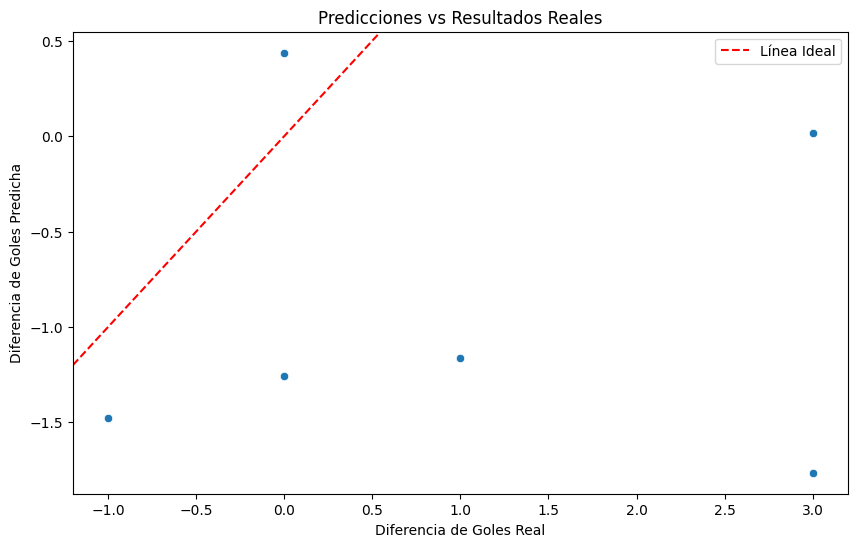

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear gráfica de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Diferencia de Goles Real')
plt.ylabel('Diferencia de Goles Predicha')
plt.title('Predicciones vs Resultados Reales')
plt.axline((0, 0), slope=1, color='red', linestyle='--', label='Línea Ideal') # Linea ideal
plt.legend()
plt.show()

In [9]:
import ipywidgets as widgets

# Widgets de entrada
posesion_input = widgets.FloatSlider(min=30, max=70, step=1, description='Posesión (%)')
tiros_input = widgets.IntSlider(min=1, max=15, step=1, description='Tiros al Arco')

# Funcion de predicción
def predecir_goles(posesion, tiros):
    # Crear un DataFrame temporal con nombres de columnas esperados por el modelo
    entrada = pd.DataFrame([[posesion, tiros]], columns=['posesion_local (%)', 'tiros_arco_local'])
    pred = modelo_rl.predict(entrada)[0]
    print(f"Diferencia de goles predicha: {pred:.2f}")

# Mostrar widget interactivo
widgets.interactive(predecir_goles, posesion=posesion_input, tiros=tiros_input)

interactive(children=(FloatSlider(value=30.0, description='Posesión (%)', max=70.0, min=30.0, step=1.0), IntSl…